<a href="https://colab.research.google.com/github/DamodaraBarbosa/eleicoes_ceara_2022/blob/main/05_seg_turno_presidente_eleicoes_ceara_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instala√ß√£o das bibliotecas `geopandas`, `geobr` e `descartes`

In [12]:
!pip install geopandas geobr descartes

Importando as bibliotecas

In [13]:
import pandas as pd
import numpy as np
import geopandas as gpd
from geobr import read_municipality
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [14]:
# Para ignorar qualquer aviso:

import warnings

warnings.filterwarnings("ignore")

# 1. Carregamento dos dados no *dataframe*

In [15]:
# Os dados da elei√ß√£o presidencial s√£o carregados:

presidente = pd.read_csv(
    '/content/drive/MyDrive/eleicoes_ceara_2022/votacao_secao_2022_BR_tratado.csv',
    encoding='latin-1', sep=','
)

# Selecionam-se apenas os dados do 2¬∫ turno:

presidente = presidente.query('nr_turno == 2')
presidente.head(2)

nm_municipio  nr_turno  nr_zona  nr_secao    ds_cargo  nr_votavel  \
155     PACATUBA         2       57       270  PRESIDENTE          13   
156      CRATE√öS         2       20       209  PRESIDENTE          13   

                    nm_votavel  qt_votos  
155  LUIZ IN√ÅCIO LULA DA SILVA       175  
156  LUIZ IN√ÅCIO LULA DA SILVA       200

# 2. Informa√ß√µes do *dataframe*

## 2.1. Dimens√µes do *dataframe*

In [16]:
presidente.shape

(88629, 8)

## 2.2 Infos do *dataframe*

In [17]:
presidente.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88629 entries, 155 to 242820
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   nm_municipio  88629 non-null  object
 1   nr_turno      88629 non-null  int64 
 2   nr_zona       88629 non-null  int64 
 3   nr_secao      88629 non-null  int64 
 4   ds_cargo      88629 non-null  object
 5   nr_votavel    88629 non-null  int64 
 6   nm_votavel    88629 non-null  object
 7   qt_votos      88629 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 6.1+ MB


## 2.3. Dados faltantes

In [18]:
presidente.isna().sum()

nm_municipio    0
nr_turno        0
nr_zona         0
nr_secao        0
ds_cargo        0
nr_votavel      0
nm_votavel      0
qt_votos        0
dtype: int64

> N√£o h√° dados faltantes.

## 2.4. Dados duplicados

In [19]:
presidente.loc[presidente.duplicated()]

Empty DataFrame
Columns: [nm_municipio, nr_turno, nr_zona, nr_secao, ds_cargo, nr_votavel, nm_votavel, qt_votos]
Index: []

> N√£o h√° dados duplicados.

# 3. An√°lise do 2¬∫ turno da elei√ß√£o para presidente no Cear√°

## 3.1. Candidatos

In [20]:
presidente['nm_votavel'].unique()

array(['LUIZ IN√ÅCIO LULA DA SILVA', 'JAIR MESSIAS BOLSONARO', 'VOTO NULO',
       'VOTO BRANCO'], dtype=object)

> Excetuando **voto nulo e voto branco**, que n√£o s√£o candidatos, tivemos **Luiz In√°cio Lula da Silva e Jair Messias Bolsonaro.**

## 3.2. Votos por candidato

In [21]:
# Determina-se a quantidade de votos por candidato:

votos_por_candidato = presidente.groupby('nm_votavel')['qt_votos'].sum().sort_values()

In [22]:
fig = px.bar(
    x=votos_por_candidato.values,
    y=votos_por_candidato.keys(),
    color=votos_por_candidato.keys(),
    text=votos_por_candidato.values,
    title='Votos por candidato (2¬∫ turno para presidente)'
)
fig.update_layout(title=dict(x=0.5), xaxis_title='Votos', yaxis_title='Candidatos', showlegend=False)
fig.update_traces(textfont_size=12, textposition='outside')
fig.update_xaxes(range=[0, 4.2e6])
fig.show()

> O candidato mais votado no 2¬∫ turno para presidente no estado do Cear√° foi Luiz In√°cio Lula da Silva.

## 3.3. Porcentagem dos votos totais e v√°lidos

In [23]:
# Excetuam-se os votos brancos e nulos:

votos_validos = presidente.query('nm_votavel != ["VOTO NULO", "VOTO BRANCO"]')

# Calcula-se apenas os votos v√°lidos:

total_votos_validos = votos_validos['qt_votos'].sum()
print(f'Votos v√°lidos: {total_votos_validos}')

# Votos totais incluindo brancos e nulos:

total_votos = presidente['qt_votos'].sum()
print(f'Votos totais: {total_votos}')

Votos v√°lidos: 5442368
Votos totais: 5649398


In [24]:
votos_validos['nm_votavel'].unique()

array(['LUIZ IN√ÅCIO LULA DA SILVA', 'JAIR MESSIAS BOLSONARO'],
      dtype=object)

> **VOTO BRANCO e VOTO NULO** foram removidos na vari√°vel `votos_validos`.

In [25]:
# Instancia-se um dataframe contendo a porcentagem de votos totais e votos v√°lidos por candidato ao senado:

porcentagem_votos_presidente = pd.DataFrame(
    {'Votos totais': round((presidente.groupby('nm_votavel')['qt_votos'].sum()/total_votos) * 100, 2), # c√°lculo da porcentagem de votos totais.
     'Votos v√°lidos': round((votos_validos.groupby('nm_votavel')['qt_votos'].sum()/total_votos_validos) * 100, 2)} # c√°lculo da porcentagem de votos v√°lidos.
).sort_values(['Votos totais', 'Votos v√°lidos'], ascending=[False, False]) # os dados s√£o ordenados em ordem decrescente.

# Utiliza-se o m√©todo transpose para inverter index em colunas e vice-versa:

porcentagem_votos_presidente = porcentagem_votos_presidente.transpose()

porcentagem_votos_presidente

nm_votavel     LUIZ IN√ÅCIO LULA DA SILVA  JAIR MESSIAS BOLSONARO  VOTO NULO  \
Votos totais                       67.40                   28.93       2.48   
Votos v√°lidos                      69.97                   30.03        NaN   

nm_votavel     VOTO BRANCO  
Votos totais          1.19  
Votos v√°lidos          NaN

In [26]:
fig = px.bar(
    data_frame=porcentagem_votos_presidente,
    x=porcentagem_votos_presidente.columns,
    y=porcentagem_votos_presidente.index,
    title='Porcentagem dos votos totais e v√°lidos ao cargo de presidente no 2¬∫ turno do Cear√°'
)
fig.update_layout(title=dict(x=0.5), yaxis=dict(autorange='reversed'), legend_title='Candidatos', xaxis_title='Votos', yaxis_title='')
fig.show()

> * **Candidato Luiz In√°cio Lula da Silva ü•á:** 67,4% dos votos totais e 70,0% dos votos v√°lidos.
> * **Candidato Jair Messias Bolsonaro:** 28,9% dos votos totais e 30% dos votos v√°lidos.

## 3.4. Candidato vencedor por munic√≠pio cearense

In [27]:
# Os votos nos cadidatos √† presid√™ncia s√£o determinados:

votos_candidatos_por_municipio = presidente.groupby(['nm_municipio', 'nm_votavel'])['qt_votos'].sum().reset_index()

# Os dados s√£o ordenados em ordem alfab√©tica para os munic√≠pios e em ordem decrescente para os votos:

votos_candidatos_por_municipio = votos_candidatos_por_municipio.sort_values(['nm_municipio', 'qt_votos'], ascending=[True, False])

# Seleciona-se apenas o candidato que obteve mais votos em cada munic√≠pio:

vencedores_por_municipio = votos_candidatos_por_municipio.groupby('nm_municipio').head(1)
vencedores_por_municipio.head() # para visualizar o dataframe.

nm_municipio                 nm_votavel  qt_votos
1       ABAIARA  LUIZ IN√ÅCIO LULA DA SILVA      5025
5       ACARAPE  LUIZ IN√ÅCIO LULA DA SILVA      6262
9        ACARA√ö  LUIZ IN√ÅCIO LULA DA SILVA     26113
13     ACOPIARA  LUIZ IN√ÅCIO LULA DA SILVA     25144
17       AIUABA  LUIZ IN√ÅCIO LULA DA SILVA      7398

In [28]:
# Dataframe com dados geoespaciais dos munic√≠pios cearenses:

ceara_gpd = read_municipality(code_muni=23, year=2020)

# Um pequeno tratamento √© feito para que os nomes dos munic√≠pios estejam em caixa alta:

ceara_gpd['name_muni'] = ceara_gpd['name_muni'].str.upper()

ceara_gpd.head() # visualiza√ß√£o do dataframe.

code_muni name_muni  code_state abbrev_state name_state  code_region  \
0  2300101.0   ABAIARA        23.0           CE      Cear√°          2.0   
1  2300150.0   ACARAPE        23.0           CE      Cear√°          2.0   
2  2300200.0    ACARA√ö        23.0           CE      Cear√°          2.0   
3  2300309.0  ACOPIARA        23.0           CE      Cear√°          2.0   
4  2300408.0    AIUABA        23.0           CE      Cear√°          2.0   

  name_region                                           geometry  
0    Nordeste  MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...  
1    Nordeste  MULTIPOLYGON (((-38.65304 -4.15796, -38.65108 ...  
2    Nordeste  MULTIPOLYGON (((-40.30984 -2.80769, -40.26882 ...  
3    Nordeste  MULTIPOLYGON (((-39.15631 -5.95731, -39.15267 ...  
4    Nordeste  MULTIPOLYGON (((-40.11801 -6.34845, -40.11298 ...

In [29]:
# √â feita a uni√£o dos dados geoespaciais e os dados referentes aos candidatos vencedores em cada munic√≠pio:

vencedores_por_municipio_gpd = pd.merge(
    left=ceara_gpd[['name_muni', 'geometry']], right=vencedores_por_municipio,
    how='left', left_on='name_muni', right_on='nm_municipio'
)
vencedores_por_municipio_gpd = vencedores_por_municipio_gpd.drop('name_muni', axis=1) # a coluna √© eliminada visto que possui dados redundantes.

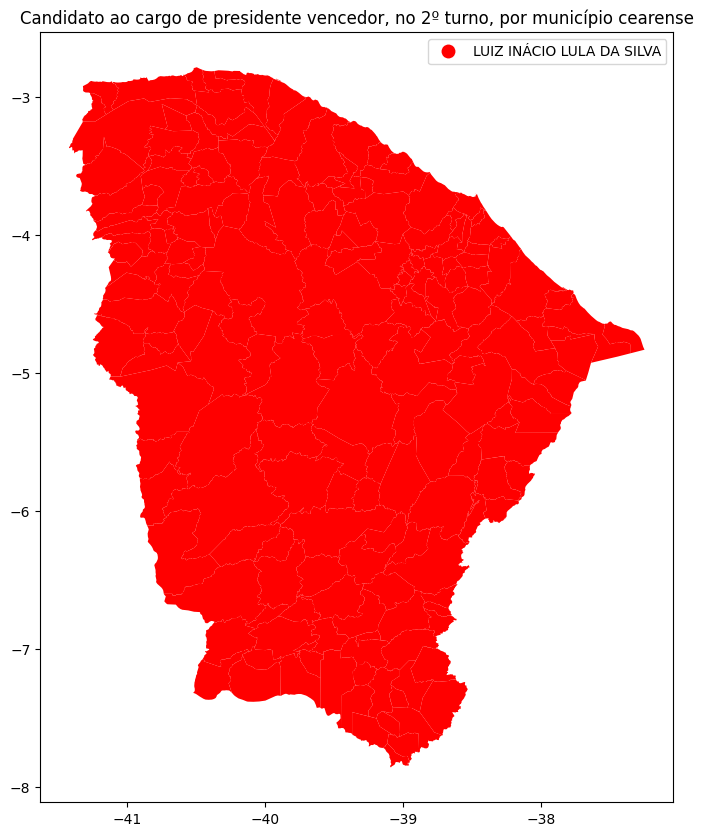

In [30]:
ax = vencedores_por_municipio_gpd.plot(
    'nm_votavel', cmap='autumn', legend=True,
    legend_kwds={'loc': 'upper right'},
    figsize=(12, 10)
)
ax.set_title('Candidato ao cargo de presidente vencedor, no 2¬∫ turno, por munic√≠pio cearense')
plt.show()

> O candidato eleito **Luiz In√°cio Lula da Silva** foi o **mais votado em todos os munic√≠pios cearenses** no 2¬∫ turno.

## 3.5. Votos para presid√™ncia nos munic√≠pios da Regi√£o Metropolitana de Fortaleza

A Regi√£o Metropolitana de Fortaleza √© constitu√≠da de 19 munic√≠pios sendo eles:

> Aquiraz, Cascavel, Caucaia, Chorozinho, Eus√©bio, Fortaleza, Guai√∫ba, Horizonte, Itaitinga, Maracana√∫, Maranguape, Pacajus, Pacatuba, Pindoretama, S√£o Gon√ßalo do Amarante, S√£o Lu√≠s do Curu, Paraipaba, Paracuru e Trairi.

Fonte: https://pt.wikipedia.org/wiki/Regi%C3%A3o_Metropolitana_de_Fortaleza


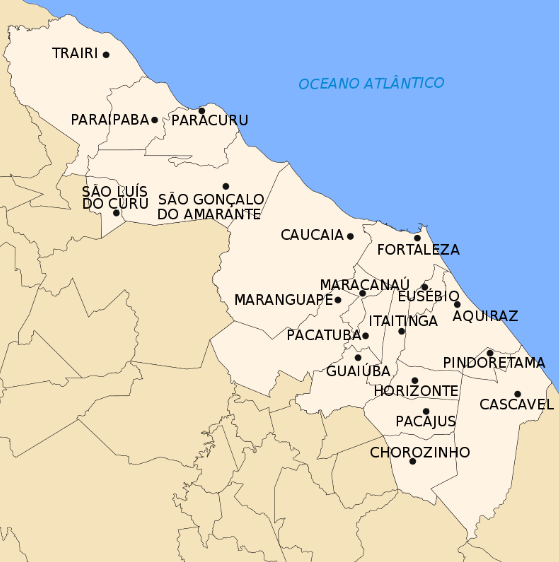

In [31]:
# Munic√≠pios da Regi√£o Metropolitana de Fortaleza:

regiao_metropolitana = [
    'AQUIRAZ', 'CASCAVEL', 'CAUCAIA', 'CHOROZINHO', 'EUS√âBIO',
    'FORTALEZA', 'GUAI√öBA', 'HORIZONTE', 'ITAITINGA', 'MARACANA√ö',
    'MARANGUAPE', 'PACAJUS', 'PACATUBA', 'PINDORETAMA',
    'S√ÉO GON√áALO DO AMARANTE', 'S√ÉO LU√çS DO CURU',
    'PARAIPABA', 'PARACURU', 'TRAIRI'
]

In [32]:
# Buscam-se no conjunto de dados √† presid√™ncia apenas os munic√≠pios da Regi√£o Metropolitana de Fortaleza:

presidente_regiao_metropolitana = presidente.query('nm_municipio in @regiao_metropolitana')

# Agrupam-se os dados por munic√≠pio e candidato para determinar os votos:

vencedores_regiao_metropolitana = presidente_regiao_metropolitana.groupby(['nm_municipio', 'nm_votavel'])['qt_votos'].sum().reset_index()

# Os dados s√£o ordenados em ordem alfab√©tica e em ordem decrescente do n√∫mero de votos:

vencedores_regiao_metropolitana = vencedores_regiao_metropolitana.sort_values(['nm_municipio', 'qt_votos'], ascending=[True, False])

vencedores_regiao_metropolitana.head()

nm_municipio                 nm_votavel  qt_votos
1      AQUIRAZ  LUIZ IN√ÅCIO LULA DA SILVA     33374
0      AQUIRAZ     JAIR MESSIAS BOLSONARO     17580
3      AQUIRAZ                  VOTO NULO      1130
2      AQUIRAZ                VOTO BRANCO       634
5     CASCAVEL  LUIZ IN√ÅCIO LULA DA SILVA     31901

In [33]:
# Instancia-se um dicion√°rio contendo o n¬∫ de votos totais ao cargo de senador por munic√≠pio da Regi√£o Metropolitana de Fortaleza:

votos_regiao_metropolitana = presidente.groupby('nm_municipio')['qt_votos'].sum()
votos_regiao_metropolitana = dict(votos_regiao_metropolitana)

In [34]:
# C√°lculo da porcentagem de votos que cada candidato ao senado obteve em cada munic√≠pio da Regi√£o Metropolitana de Fortaleza:
# Para isso define-se uma fun√ß√£o para o c√°lculo.

def porcentagem_votos(dataframe: pd.DataFrame, dictionary: dict):

  percentual_de_votos = list()

  for index, row in dataframe.iterrows(): # itera-se o dataframe para obter cada linha dele.
    porcentagem = round((row['qt_votos']/dictionary[row['nm_municipio']]) * 100, 2) # os votos s√£o divididos pelo total de votos por munic√≠pio.
    percentual_de_votos.append(porcentagem) # o valor calculado √© adicionado a lista.

  return percentual_de_votos

In [35]:
# A coluna com porcentagem de votos √© adicionada ao dataframe:

porcentagens = porcentagem_votos(vencedores_regiao_metropolitana, votos_regiao_metropolitana) # porcentagens armazena as porcentagens de votos.
vencedores_regiao_metropolitana['porcentagem'] = porcentagens # cria√ß√£o da nova coluna no dataframe.

In [36]:
vencedores_regiao_metropolitana.head()

nm_municipio                 nm_votavel  qt_votos  porcentagem
1      AQUIRAZ  LUIZ IN√ÅCIO LULA DA SILVA     33374        63.31
0      AQUIRAZ     JAIR MESSIAS BOLSONARO     17580        33.35
3      AQUIRAZ                  VOTO NULO      1130         2.14
2      AQUIRAZ                VOTO BRANCO       634         1.20
5     CASCAVEL  LUIZ IN√ÅCIO LULA DA SILVA     31901        65.86

In [37]:
fig = px.bar(
    data_frame=vencedores_regiao_metropolitana, y='nm_municipio', x='porcentagem', color='nm_votavel',
    title='Porcentagem dos votos nos candidados √† presid√™ncia por munic√≠pio da Regi√£o Metropolitana de Fortaleza'
)
fig.update_layout(
    title=dict(x=0.5), yaxis=dict(autorange='reversed'), yaxis_title='Munic√≠pios',
    xaxis_title='Porcentagem dos votos', legend_title='Candidatos'
)
fig.show()

> * Os votos no candidato eleito **Luiz In√°cio Lula da Silva** variam entre 50% e 70% nos munic√≠pios da Regi√£o Metropolitana de Fortaleza.
> * Fortaleza e Eus√©bio foram os munic√≠pios da Grande Fortaleza onde o candidato **Jair Messias Bolsonaro** teve mais votos.


## 3.6. Compara√ß√£o dos votos com os indicadores do IBGE

In [38]:
dados_ibge = pd.read_csv('/content/drive/MyDrive/Datasets/resumo_dados_ibge_ce.csv', encoding='latin-1')
dados_ibge.head()

nome  area_territorio  populacao   idhm  pib_per_capita  \
0   ABAIARA          180.833      11965  0.628         9158.04   
1   ACARAPE          130.002      15140  0.606        10317.47   
2    ACARA√ö          842.471      63556  0.601        13261.89   
3  ACOPIARA         2254.279      54687  0.595         9432.25   
4    AIUABA         2438.563      17584  0.569         8642.90   

   area_urbanizada  porcentagem_urbana  densidade_populacional  
0             3.19                1.76                   66.17  
1             2.28                1.75                  116.46  
2            16.33                1.94                   75.44  
3             5.46                0.24                   24.26  
4             2.07                0.08                    7.21

Visto que o candidato eleito Luiz In√°cio Lula da Silva saiu como o mais votado em todos os munic√≠pios cearenses, n√£o faz sentido comparar o mapa com os candidatos vencedores por munic√≠pio do Cear√°. Portanto, as an√°lises ser√£o feitas comparando o mapa com o percentual de votos do candidato vencedor com os indicadores socioecon√¥micos do IBGE.

In [39]:
# Os votos no candidato eleito Lula da Silva por munic√≠pio cearense s√£o obtidos:

votos_lula_por_municipio = presidente.query('nm_votavel == "LUIZ IN√ÅCIO LULA DA SILVA"')\
                                     .groupby('nm_municipio')['qt_votos'].sum().reset_index()

votos_lula_por_municipio.head()

nm_municipio  qt_votos
0      ABAIARA      5025
1      ACARAPE      6262
2       ACARA√ö     26113
3     ACOPIARA     25144
4       AIUABA      7398

In [40]:
# Somam-se os votos totais para cada munic√≠pio cearense:

votos_totais_por_municipio = presidente.groupby('nm_municipio')['qt_votos'].sum()
votos_totais_por_municipio = dict(votos_totais_por_municipio) # dicion√°rio com o n¬∫ de votos por munic√≠pio, cada nome do munic√≠pio √© uma chave.

In [41]:
# A porcentagem de votos no candidato eleito Lula da Silva por munic√≠pio √©, ent√£o, calculada:

porcentagens_lula = porcentagem_votos(votos_lula_por_municipio, votos_totais_por_municipio)

# E os valores s√£o inseridos no dataframe com a cria√ß√£o de uma nova coluna:

votos_lula_por_municipio['porcentagem_votos'] = porcentagens_lula
votos_lula_por_municipio.head()

nm_municipio  qt_votos  porcentagem_votos
0      ABAIARA      5025              84.40
1      ACARAPE      6262              61.81
2       ACARA√ö     26113              70.53
3     ACOPIARA     25144              80.11
4       AIUABA      7398              85.50

In [42]:
# √â feito o merge dos dados geoespaciais dos munic√≠pios com os indicadores do IBGE:

dados_ibge = pd.merge(
    left=ceara_gpd[['name_muni', 'geometry']], right=dados_ibge,
    how='left', left_on='name_muni', right_on='nome'
)
dados_ibge = dados_ibge.drop('nome', axis=1) # a coluna nome √© retirada, pois √© redundante.

# √â feito o merge dos dados geoespaciais dos munic√≠pios com os dados dos votos no candidato eleito Lula da Silva:

votos_lula_por_municipio = pd.merge(
    left=ceara_gpd[['name_muni', 'geometry']], right=votos_lula_por_municipio,
    how='left', left_on='name_muni', right_on='nm_municipio'
)
votos_lula_por_municipio = votos_lula_por_municipio.drop('nm_municipio', axis=1) # a coluna nm_municipio √© retirada, pois √© redundante.

### 3.6.1. Densidade populacional

O conjunto de dados na coluna `densidade_populacional` √© bastante discrepante. O munic√≠pio de Fortaleza concentra mais de 2,5 milh√µes de habitantes em territ√≥rio modesto, se comparado a outros munic√≠pios cearenses. Portanto, aplica-se transforma√ß√£o logar√≠timica para homogeneizar e visualizar melhor os dados:

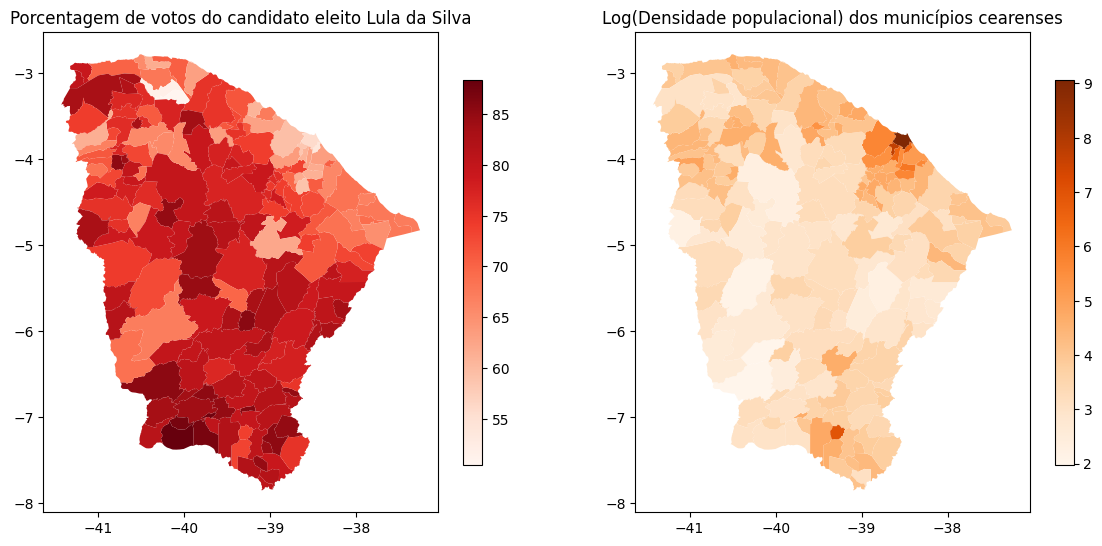

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(14, 10))

ax1 = votos_lula_por_municipio.plot('porcentagem_votos', legend=True, cmap='Reds', legend_kwds={'shrink': 0.5}, ax=ax[0])
ax1.set_title('Porcentagem de votos do candidato eleito Lula da Silva')
ax2 = dados_ibge.plot(np.log(dados_ibge['densidade_populacional']), cmap='Oranges', legend=True, legend_kwds={'shrink': 0.5}, ax=ax[1])
ax2.set_title('Log(Densidade populacional) dos munic√≠pios cearenses')
plt.show()

### 3.6.2. Ind√≠ce de desenvolvimento humano municipal (IDHM)

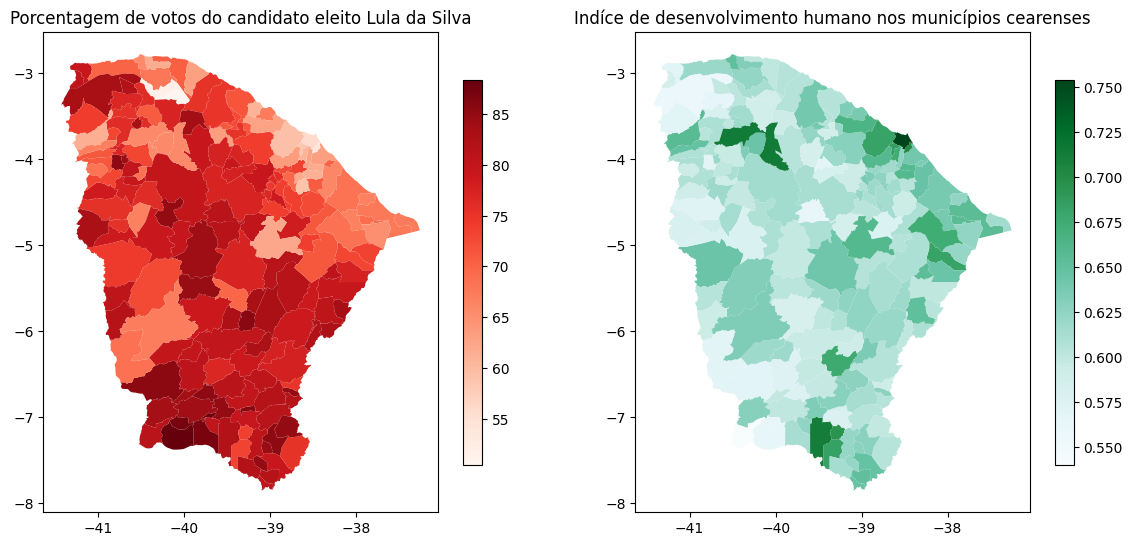

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(14, 10))

ax1 = votos_lula_por_municipio.plot('porcentagem_votos', legend=True, cmap='Reds', legend_kwds={'shrink': 0.5}, ax=ax[0])
ax1.set_title('Porcentagem de votos do candidato eleito Lula da Silva')
ax2 = dados_ibge.plot('idhm', cmap='BuGn', legend=True, legend_kwds={'shrink': 0.5}, ax=ax[1])
ax2.set_title('Ind√≠ce de desenvolvimento humano nos munic√≠pios cearenses')
plt.show()

### 3.6.3. PIB *per capita*

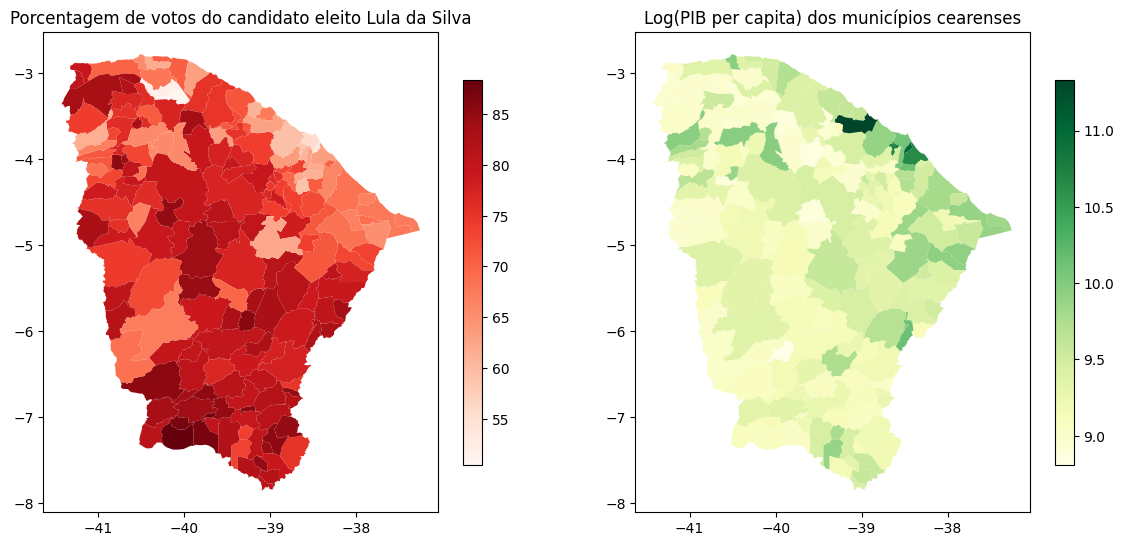

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(14, 10))

ax1 = votos_lula_por_municipio.plot('porcentagem_votos', legend=True, cmap='Reds', legend_kwds={'shrink': 0.5}, ax=ax[0])
ax1.set_title('Porcentagem de votos do candidato eleito Lula da Silva')
ax2 = dados_ibge.plot(np.log(dados_ibge['pib_per_capita']), cmap='YlGn', legend=True, legend_kwds={'shrink': 0.5}, ax=ax[1])
ax2.set_title('Log(PIB per capita) dos munic√≠pios cearenses')
plt.show()

### 3.6.4. √Årea urbanizada

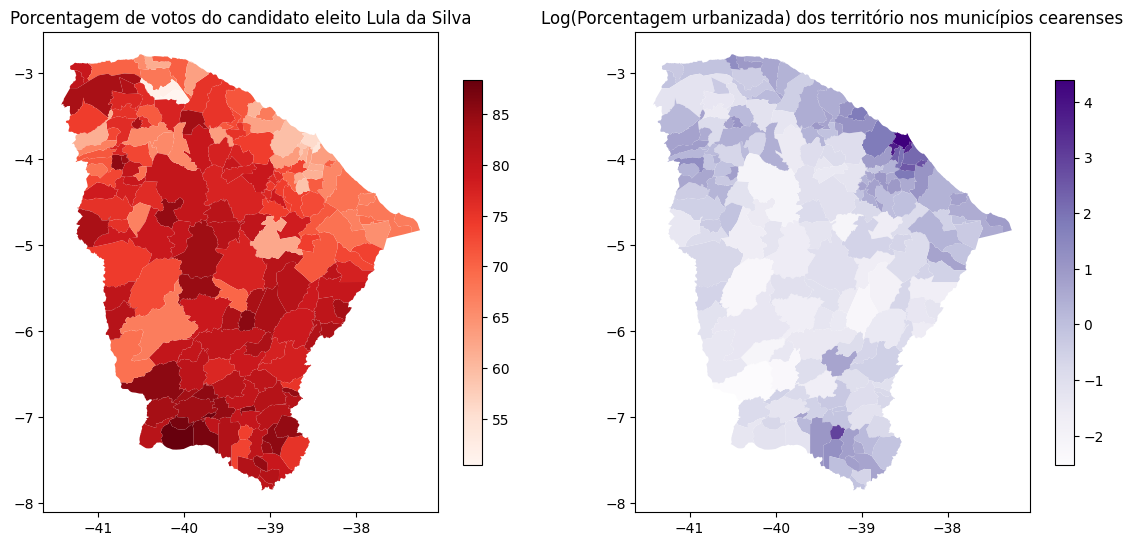

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(14, 10))

ax1 = votos_lula_por_municipio.plot('porcentagem_votos', legend=True, cmap='Reds', legend_kwds={'shrink': 0.5}, ax=ax[0])
ax1.set_title('Porcentagem de votos do candidato eleito Lula da Silva')
ax2 = dados_ibge.plot(np.log(dados_ibge['porcentagem_urbana']), cmap='Purples', legend=True, legend_kwds={'shrink': 0.5}, ax=ax[1])
ax2.set_title('Log(Porcentagem urbanizada) dos territ√≥rio nos munic√≠pios cearenses')
plt.show()

## 3.7. An√°lise por intervalo de indicadores socioecon√¥micos

H√° a possibilidade de analisar os votos por grupos, intervalos dos indicadores socioecon√¥micos do IBGE. Instancia-se um *dataframe* com a quantidade de votos para cada candidato em cada munic√≠pio cearense.

In [47]:
# Os dados s√£o agrupados por nome do munic√≠pio e candidato e os votos somados. Por √∫ltimo, os ind√≠ces s√£o resetados:

votos_candidatos_por_municipio = presidente.groupby(['nm_municipio', 'nm_votavel'])['qt_votos'].sum().reset_index()
votos_candidatos_por_municipio.head()

nm_municipio                 nm_votavel  qt_votos
0      ABAIARA     JAIR MESSIAS BOLSONARO       725
1      ABAIARA  LUIZ IN√ÅCIO LULA DA SILVA      5025
2      ABAIARA                VOTO BRANCO        63
3      ABAIARA                  VOTO NULO       141
4      ACARAPE     JAIR MESSIAS BOLSONARO      3526

In [48]:
# Os dados socioecon√¥micos do IBGE s√£o juntados ao dataframe dos votos:

votos_candidatos_por_municipio = pd.merge(
    left=votos_candidatos_por_municipio, right=dados_ibge,
    how='left', left_on='nm_municipio', right_on='name_muni'
)

# A coluna nome √© retirada, pois os dados s√£o redundantes:

votos_candidatos_por_municipio = votos_candidatos_por_municipio.drop('name_muni', axis=1)
votos_candidatos_por_municipio.head()

nm_municipio                 nm_votavel  qt_votos  \
0      ABAIARA     JAIR MESSIAS BOLSONARO       725   
1      ABAIARA  LUIZ IN√ÅCIO LULA DA SILVA      5025   
2      ABAIARA                VOTO BRANCO        63   
3      ABAIARA                  VOTO NULO       141   
4      ACARAPE     JAIR MESSIAS BOLSONARO      3526   

                                            geometry  area_territorio  \
0  MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...          180.833   
1  MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...          180.833   
2  MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...          180.833   
3  MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...          180.833   
4  MULTIPOLYGON (((-38.65304 -4.15796, -38.65108 ...          130.002   

   populacao   idhm  pib_per_capita  area_urbanizada  porcentagem_urbana  \
0      11965  0.628         9158.04             3.19                1.76   
1      11965  0.628         9158.04             3.19                1.76   
2      11965  0.628         9158.04             3.19                1.76   
3      11965  0.628         9158.04             3.19                1.76   
4      15140  0.606        10317.47             2.28                1.75   

   densidade_populacional  
0                   66.17  
1                   66.17  
2                   66.17  
3                   66.17  
4                  116.46

As fun√ß√µes abaixo ser√£o utilizadas para ajustar os dados para an√°lise:

In [49]:
def intervalos_ibge(dataframe: pd.DataFrame, nome_coluna: str, nova_coluna: str, bins: list, labels: list):
  """
  A fun√ß√£o 'intervalos_ibge' adiciona ao dataframe com os votos dos candidatos por munic√≠pio uma nova coluna. Tal coluna passa a conter um intervalo
  pr√©-determinado determinado indicador do IBGE relacionado ao munic√≠pio em quest√£o.

  dataframe: dataframe contendo os votos por candidato em cada munic√≠pio.
  nome_coluna: coluna com a informa√ß√£o que ser√° utilizada para gerar o intervalo.
  nova_coluna: nome da nova coluna contendo os intervalos dos indicadores do IBGE.
  bins: lista com os valores que ser√£o usados para formar os intervalos dos indicadores.
  labels: lista com as labels dos intervalos.
  """

  dataframe[nova_coluna] = pd.cut(
      dataframe[nome_coluna], bins=bins, labels=labels,
      include_lowest=True, right=False # o valor mais baixo √© incluso, enquanto o valor maior n√£o √© incluso.
  )

  return dataframe # retorna o dataframe, agora contendo a coluna com os intervalos dos indicadores do IBGE.

def dict_votos_totais(dataframe: pd.DataFrame, coluna_indicador: str):
  """
  A fun√ß√£o dict_votos_totais retorna um dicion√°rio com a quantidade de votos gerais para cada intervalo dos indicadores do IBGE.

  dataframe: contendo os votos por candidato em cada munic√≠pio, al√©m da coluna com os intervalos dos indicadores.
  coluna_indicador: nome da coluna contendo os intervalos dos indicadores.
  """

  valores_totais = dataframe.groupby(coluna_indicador)['qt_votos'].sum()
  valores_totais = dict(valores_totais)

  return valores_totais

def dataframe_com_porcentagens(dataframe: pd.DataFrame, dictionary: dict, coluna_indicador: str):
  """
  A fun√ß√£o dataframe_com_porcentagens retorna um dataframe contendo a porcentagem de votos para cada candidato referente a cada intervalo de indicador.

  dataframe: dataframe com votos dos candidatos por munic√≠pios.
  dictionary: dicion√°rio contendo os votos totais de cada intervalo de indicador do IBGE.
  coluna_indicador: coluna com o indicador do IBGE que se deseja calcular os valores de porcentagem.
  """

  # O dataframe √© agrupado pela coluna com os indicadores e nome dos candidatos, os votos s√£o somados e ordenados:

  dataframe_intervalos_ibge = dataframe.groupby([coluna_indicador, 'nm_votavel'])['qt_votos'].sum()\
                                       .reset_index().sort_values([coluna_indicador, 'qt_votos'], ascending=[True, False])

  # A porcentagem para cada candidado em cada intervalo do indicador √© calculada:

  porcentagem = list()

  for index, row in dataframe_intervalos_ibge.iterrows():
    valor = round((row['qt_votos']/dictionary[row[coluna_indicador]]) * 100, 2)
    porcentagem.append(valor)

  # E depois uma nova coluna √© adicionada ao dataframe que √© retornado:

  dataframe_intervalos_ibge['porcentagem_' + coluna_indicador] = porcentagem # o nome da coluna √© obtido a partir da concatena√ß√£o das strings.

  return dataframe_intervalos_ibge

## 3.7. An√°lise por intervalo de indicadores socioecon√¥micos

H√° a possibilidade de analisar os votos por grupos, intervalos dos indicadores socioecon√¥micos do IBGE. Instancia-se um *dataframe* com a quantidade de votos para cada candidato em cada munic√≠pio cearense.

In [50]:
# Os dados s√£o agrupados por nome do munic√≠pio e candidato e os votos somados. Por √∫ltimo, os ind√≠ces s√£o resetados:

votos_candidatos_por_municipio = presidente.groupby(['nm_municipio', 'nm_votavel'])['qt_votos'].sum().reset_index()
votos_candidatos_por_municipio.head()

nm_municipio                 nm_votavel  qt_votos
0      ABAIARA     JAIR MESSIAS BOLSONARO       725
1      ABAIARA  LUIZ IN√ÅCIO LULA DA SILVA      5025
2      ABAIARA                VOTO BRANCO        63
3      ABAIARA                  VOTO NULO       141
4      ACARAPE     JAIR MESSIAS BOLSONARO      3526

In [51]:
# Os dados socioecon√¥micos do IBGE s√£o juntados ao dataframe dos votos:

votos_candidatos_por_municipio = pd.merge(
    left=votos_candidatos_por_municipio, right=dados_ibge,
    how='left', left_on='nm_municipio', right_on='name_muni'
)

# A coluna nome √© retirada, pois os dados s√£o redundantes:

votos_candidatos_por_municipio = votos_candidatos_por_municipio.drop('name_muni', axis=1)
votos_candidatos_por_municipio.head()

nm_municipio                 nm_votavel  qt_votos  \
0      ABAIARA     JAIR MESSIAS BOLSONARO       725   
1      ABAIARA  LUIZ IN√ÅCIO LULA DA SILVA      5025   
2      ABAIARA                VOTO BRANCO        63   
3      ABAIARA                  VOTO NULO       141   
4      ACARAPE     JAIR MESSIAS BOLSONARO      3526   

                                            geometry  area_territorio  \
0  MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...          180.833   
1  MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...          180.833   
2  MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...          180.833   
3  MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...          180.833   
4  MULTIPOLYGON (((-38.65304 -4.15796, -38.65108 ...          130.002   

   populacao   idhm  pib_per_capita  area_urbanizada  porcentagem_urbana  \
0      11965  0.628         9158.04             3.19                1.76   
1      11965  0.628         9158.04             3.19                1.76   
2      11965  0.628         9158.04             3.19                1.76   
3      11965  0.628         9158.04             3.19                1.76   
4      15140  0.606        10317.47             2.28                1.75   

   densidade_populacional  
0                   66.17  
1                   66.17  
2                   66.17  
3                   66.17  
4                  116.46

As fun√ß√µes abaixo ser√£o utilizadas para ajustar os dados para an√°lise:

In [52]:
def intervalos_ibge(dataframe: pd.DataFrame, nome_coluna: str, nova_coluna: str, bins: list, labels: list):
  """
  A fun√ß√£o 'intervalos_ibge' adiciona ao dataframe com os votos dos candidatos por munic√≠pio uma nova coluna. Tal coluna passa a conter um intervalo
  pr√©-determinado determinado indicador do IBGE relacionado ao munic√≠pio em quest√£o.

  dataframe: dataframe contendo os votos por candidato em cada munic√≠pio.
  nome_coluna: coluna com a informa√ß√£o que ser√° utilizada para gerar o intervalo.
  nova_coluna: nome da nova coluna contendo os intervalos dos indicadores do IBGE.
  bins: lista com os valores que ser√£o usados para formar os intervalos dos indicadores.
  labels: lista com as labels dos intervalos.
  """

  dataframe[nova_coluna] = pd.cut(
      dataframe[nome_coluna], bins=bins, labels=labels,
      include_lowest=True, right=False # o valor mais baixo √© incluso, enquanto o valor maior n√£o √© incluso.
  )

  return dataframe # retorna o dataframe, agora contendo a coluna com os intervalos dos indicadores do IBGE.

def dict_votos_totais(dataframe: pd.DataFrame, coluna_indicador: str):
  """
  A fun√ß√£o dict_votos_totais retorna um dicion√°rio com a quantidade de votos gerais para cada intervalo dos indicadores do IBGE.

  dataframe: contendo os votos por candidato em cada munic√≠pio, al√©m da coluna com os intervalos dos indicadores.
  coluna_indicador: nome da coluna contendo os intervalos dos indicadores.
  """

  valores_totais = dataframe.groupby(coluna_indicador)['qt_votos'].sum()
  valores_totais = dict(valores_totais)

  return valores_totais

def dataframe_com_porcentagens(dataframe: pd.DataFrame, dictionary: dict, coluna_indicador: str):
  """
  A fun√ß√£o dataframe_com_porcentagens retorna um dataframe contendo a porcentagem de votos para cada candidato referente a cada intervalo de indicador.

  dataframe: dataframe com votos dos candidatos por munic√≠pios.
  dictionary: dicion√°rio contendo os votos totais de cada intervalo de indicador do IBGE.
  coluna_indicador: coluna com o indicador do IBGE que se deseja calcular os valores de porcentagem.
  """

  # O dataframe √© agrupado pela coluna com os indicadores e nome dos candidatos, os votos s√£o somados e ordenados:

  dataframe_intervalos_ibge = dataframe.groupby([coluna_indicador, 'nm_votavel'])['qt_votos'].sum()\
                                       .reset_index().sort_values([coluna_indicador, 'qt_votos'], ascending=[True, False])

  # A porcentagem para cada candidado em cada intervalo do indicador √© calculada:

  porcentagem = list()

  for index, row in dataframe_intervalos_ibge.iterrows():
    valor = round((row['qt_votos']/dictionary[row[coluna_indicador]]) * 100, 2)
    porcentagem.append(valor)

  # E depois uma nova coluna √© adicionada ao dataframe que √© retornado:

  dataframe_intervalos_ibge['porcentagem_' + coluna_indicador] = porcentagem # o nome da coluna √© obtido a partir da concatena√ß√£o das strings.

  return dataframe_intervalos_ibge

### 3.7.1. Intervalos populacionais

In [53]:
# Intervalos:

bins = [0, 100000, 500000, 3000000]

# Labels para os intervalos populacionais:

labels = ['Menos de 100 mil habitantes', '100 mil e menos de 500 mil habitantes', '500 mil habitantes ou mais']

In [54]:
# Uma nova coluna com os intervalos populacionais √© adicionada ao dataframe:

votos_candidatos_por_municipio = intervalos_ibge(
    dataframe=votos_candidatos_por_municipio,
    nome_coluna='populacao',
    nova_coluna='populacao_intervalos',
    bins=bins, labels=labels
)
votos_candidatos_por_municipio.head(2)

nm_municipio                 nm_votavel  qt_votos  \
0      ABAIARA     JAIR MESSIAS BOLSONARO       725   
1      ABAIARA  LUIZ IN√ÅCIO LULA DA SILVA      5025   

                                            geometry  area_territorio  \
0  MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...          180.833   
1  MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...          180.833   

   populacao   idhm  pib_per_capita  area_urbanizada  porcentagem_urbana  \
0      11965  0.628         9158.04             3.19                1.76   
1      11965  0.628         9158.04             3.19                1.76   

   densidade_populacional         populacao_intervalos  
0                   66.17  Menos de 100 mil habitantes  
1                   66.17  Menos de 100 mil habitantes

In [55]:
# Os votos totais para cada intervalo populacional s√£o mostrados no dicion√°rio:

votos_por_intervalo_populacional = dict_votos_totais(votos_candidatos_por_municipio, 'populacao_intervalos')
votos_por_intervalo_populacional

{'Menos de 100 mil habitantes': 3152219,
 '100 mil e menos de 500 mil habitantes': 922505,
 '500 mil habitantes ou mais': 1574674}

In [56]:
# As porcentagens dos votos para cada candidato em cada munic√≠pio s√£o calculadas e mostradas abaixo:

votos_intervalos_populacionais = dataframe_com_porcentagens(
    votos_candidatos_por_municipio, votos_por_intervalo_populacional, 'populacao_intervalos'
)
votos_intervalos_populacionais.head()

populacao_intervalos                 nm_votavel  qt_votos  \
1            Menos de 100 mil habitantes  LUIZ IN√ÅCIO LULA DA SILVA   2305474   
0            Menos de 100 mil habitantes     JAIR MESSIAS BOLSONARO    734428   
3            Menos de 100 mil habitantes                  VOTO NULO     76277   
2            Menos de 100 mil habitantes                VOTO BRANCO     36040   
5  100 mil e menos de 500 mil habitantes  LUIZ IN√ÅCIO LULA DA SILVA    621858   

   porcentagem_populacao_intervalos  
1                             73.14  
0                             23.30  
3                              2.42  
2                              1.14  
5                             67.41

In [57]:
fig = px.bar(
    data_frame=votos_intervalos_populacionais,
    y='populacao_intervalos',
    x='porcentagem_populacao_intervalos',
    color='nm_votavel',
    title='Porcentagem de votos dos candidatos por intervalo populacional dos munic√≠pios cearenses'
)
fig.update_layout(
    yaxis_title='', xaxis_title='Porcentagem dos votos', legend_title='Candidatos',
    yaxis= dict(autorange='reversed'), title=dict(x=0.5)
)
fig.show()

> * O percentual de votos em **branco e nulo praticamente n√£o se altera nos diferentes estratos.**
> * O percentual de votos no candidato **Jair Messias Bolsonaro aumenta nos intervalos dos munic√≠pios com maior popula√ß√£o.**
> * Apesar da propor√ß√£o de votos no candidato eleito **Luiz In√°cio Lula da Silva** nos estratos de maior popula√ß√£o **diminuir**, ele manteve **mais de metade dos votos** em todos os intervalos.

### 3.7.2. Intervalos de ind√≠ce de desenvolvimento humano (IDHM)

In [58]:
# Intervalos:

bins = [0, 0.55, 0.7, 0.8]

# Labels para os intervalos de IDH municipal:

labels = ['IDH baixo', 'IDH m√©dio', 'IDH alto']

In [59]:
# Uma nova coluna com os intervalos de IDHM √© adicionada ao dataframe:

votos_candidatos_por_municipio = intervalos_ibge(
    dataframe=votos_candidatos_por_municipio,
    nome_coluna='idhm',
    nova_coluna='idhm_intervalos',
    bins=bins, labels=labels
)
votos_candidatos_por_municipio.head(2)

nm_municipio                 nm_votavel  qt_votos  \
0      ABAIARA     JAIR MESSIAS BOLSONARO       725   
1      ABAIARA  LUIZ IN√ÅCIO LULA DA SILVA      5025   

                                            geometry  area_territorio  \
0  MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...          180.833   
1  MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...          180.833   

   populacao   idhm  pib_per_capita  area_urbanizada  porcentagem_urbana  \
0      11965  0.628         9158.04             3.19                1.76   
1      11965  0.628         9158.04             3.19                1.76   

   densidade_populacional         populacao_intervalos idhm_intervalos  
0                   66.17  Menos de 100 mil habitantes       IDH m√©dio  
1                   66.17  Menos de 100 mil habitantes       IDH m√©dio

In [60]:
# Os votos totais para cada intervalo de IDHM s√£o mostrados no dicion√°rio:

votos_por_intervalo_idhm = dict_votos_totais(votos_candidatos_por_municipio, 'idhm_intervalos')
votos_por_intervalo_idhm

{'IDH baixo': 11134, 'IDH m√©dio': 3813913, 'IDH alto': 1824351}

In [61]:
# As porcentagens dos votos para cada candidato em cada munic√≠pio s√£o calculadas e mostradas abaixo:

votos_intervalos_idhm = dataframe_com_porcentagens(
    votos_candidatos_por_municipio, votos_por_intervalo_idhm, 'idhm_intervalos'
)
votos_intervalos_idhm.head()

idhm_intervalos                 nm_votavel  qt_votos  \
1       IDH baixo  LUIZ IN√ÅCIO LULA DA SILVA      9034   
0       IDH baixo     JAIR MESSIAS BOLSONARO      1744   
3       IDH baixo                  VOTO NULO       239   
2       IDH baixo                VOTO BRANCO       117   
5       IDH m√©dio  LUIZ IN√ÅCIO LULA DA SILVA   2746185   

   porcentagem_idhm_intervalos  
1                        81.14  
0                        15.66  
3                         2.15  
2                         1.05  
5                        72.00

In [62]:
fig = px.bar(
    data_frame=votos_intervalos_idhm,
    y='idhm_intervalos',
    x='porcentagem_idhm_intervalos',
    color='nm_votavel',
    title='Porcentagem de votos dos candidatos por intervalo de IDH municipal dos munic√≠pios cearenses'
)
fig.update_layout(
    yaxis_title='', xaxis_title='Porcentagem dos votos', legend_title='Candidatos',
    yaxis=dict(autorange='reversed'), title=dict(x=0.5)
)
fig.show()

> * O intervalo IDH baixo √© referente unicamente ao munic√≠pio de Salitre, o que pode ser visto abaixo:

In [63]:
votos_candidatos_por_municipio.query('idhm_intervalos == "IDH baixo"')['nm_municipio'].unique()

array(['SALITRE'], dtype=object)

> * O percentual de votos em **branco e nulo praticamente n√£o se altera nos diferentes estratos.**
> * E nesse munic√≠pio, em espec√≠fico, o candidato **Jair Bolsonaro teve um desempenho eleitoral baixo, acompanhado de grande percentual de votos do candidato eleito Lula da Silva.**
> * **Jair Bolsonaro obteve melhor desempenho** no grupo com os munic√≠pios de IDH alto. O **menor desempenho** de **Lula da Silva tamb√©m ocorreu nesse grupo**, mas ainda com a maioria dos votos (57,70%).

### 3.7.3. Intervalos de PIB *per capita*

In [64]:
# Intervalos:

bins = [0, 10000, 20000, 90000]

# Labels para os intervalos de PIB per capita:

labels = ['Menos de R$ 10000', 'Entre R$ 10000 - 19999,99', 'R$ 20000 ou mais']

In [65]:
# Uma nova coluna com os intervalos de PIB per capita √© adicionada ao dataframe:

votos_candidatos_por_municipio = intervalos_ibge(
    dataframe=votos_candidatos_por_municipio,
    nome_coluna='pib_per_capita',
    nova_coluna='pib_intervalos',
    bins=bins, labels=labels
)
votos_candidatos_por_municipio.head(2)

nm_municipio                 nm_votavel  qt_votos  \
0      ABAIARA     JAIR MESSIAS BOLSONARO       725   
1      ABAIARA  LUIZ IN√ÅCIO LULA DA SILVA      5025   

                                            geometry  area_territorio  \
0  MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...          180.833   
1  MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...          180.833   

   populacao   idhm  pib_per_capita  area_urbanizada  porcentagem_urbana  \
0      11965  0.628         9158.04             3.19                1.76   
1      11965  0.628         9158.04             3.19                1.76   

   densidade_populacional         populacao_intervalos idhm_intervalos  \
0                   66.17  Menos de 100 mil habitantes       IDH m√©dio   
1                   66.17  Menos de 100 mil habitantes       IDH m√©dio   

      pib_intervalos  
0  Menos de R$ 10000  
1  Menos de R$ 10000

In [66]:
# Os votos totais para cada intervalo de PIB per capita s√£o mostrados no dicion√°rio:

votos_por_intervalo_pib = dict_votos_totais(votos_candidatos_por_municipio, 'pib_intervalos')
votos_por_intervalo_pib

{'Menos de R$ 10000': 1130559,
 'Entre R$ 10000 - 19999,99': 2330108,
 'R$ 20000 ou mais': 2188731}

In [67]:
# As porcentagens dos votos para cada candidato em cada munic√≠pio s√£o calculadas e mostradas abaixo:

votos_intervalos_pib = dataframe_com_porcentagens(
    votos_candidatos_por_municipio, votos_por_intervalo_pib, 'pib_intervalos'
)
votos_intervalos_pib.head()

pib_intervalos                 nm_votavel  qt_votos  \
1          Menos de R$ 10000  LUIZ IN√ÅCIO LULA DA SILVA    876368   
0          Menos de R$ 10000     JAIR MESSIAS BOLSONARO    214720   
3          Menos de R$ 10000                  VOTO NULO     27554   
2          Menos de R$ 10000                VOTO BRANCO     11917   
5  Entre R$ 10000 - 19999,99  LUIZ IN√ÅCIO LULA DA SILVA   1664479   

   porcentagem_pib_intervalos  
1                       77.52  
0                       18.99  
3                        2.44  
2                        1.05  
5                       71.43

In [68]:
fig = px.bar(
    data_frame=votos_intervalos_pib,
    y='pib_intervalos',
    x='porcentagem_pib_intervalos',
    color='nm_votavel',
    title='Porcentagem de votos dos candidatos por intervalo de PIB per capita dos munic√≠pios cearenses'
)
fig.update_layout(
    yaxis_title='', xaxis_title='Porcentagem dos votos', legend_title='Candidatos',
    yaxis=dict(autorange='reversed'), title=dict(x=0.5)
)
fig.show()

> * O percentual de votos em **branco e nulo praticamente n√£o se altera nos diferentes estratos.**
> * O percentual de votos dos candidatos **Jair Bolsonaro cresce nos grupos de munic√≠pios com maior PIB *per capita*.**
* **A tend√™ncia inversa acontece com Lula da Silva**, apesar de ter em todos os grupos mais da metade dos votos.

### 3.7.4. Intervalos de territ√≥rio urbanizado

In [69]:
# Intervalos:

bins= [0, 10, 40, 90]

# Labels para os intervalos de territ√≥rio urbanizado:

labels= ['Menos de 10%', 'Entre 10 - 39,99%', '40% ou mais']

In [70]:
# Uma nova coluna com os intervalos de territ√≥rio urbanizado √© adicionada ao dataframe:

votos_candidatos_por_municipio = intervalos_ibge(
    dataframe=votos_candidatos_por_municipio,
    nome_coluna='porcentagem_urbana',
    nova_coluna='urbana_intervalos',
    bins=bins, labels=labels
)
votos_candidatos_por_municipio.head(2)

nm_municipio                 nm_votavel  qt_votos  \
0      ABAIARA     JAIR MESSIAS BOLSONARO       725   
1      ABAIARA  LUIZ IN√ÅCIO LULA DA SILVA      5025   

                                            geometry  area_territorio  \
0  MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...          180.833   
1  MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...          180.833   

   populacao   idhm  pib_per_capita  area_urbanizada  porcentagem_urbana  \
0      11965  0.628         9158.04             3.19                1.76   
1      11965  0.628         9158.04             3.19                1.76   

   densidade_populacional         populacao_intervalos idhm_intervalos  \
0                   66.17  Menos de 100 mil habitantes       IDH m√©dio   
1                   66.17  Menos de 100 mil habitantes       IDH m√©dio   

      pib_intervalos urbana_intervalos  
0  Menos de R$ 10000      Menos de 10%  
1  Menos de R$ 10000      Menos de 10%

In [71]:
# Os votos totais para cada intervalo de territ√≥rio urbanizado s√£o mostrados no dicion√°rio:

votos_por_intervalo_urbana = dict_votos_totais(votos_candidatos_por_municipio, 'urbana_intervalos')
votos_por_intervalo_urbana

{'Menos de 10%': 3615548, 'Entre 10 - 39,99%': 309428, '40% ou mais': 1724422}

In [72]:
# As porcentagens dos votos para cada candidato em cada munic√≠pio s√£o calculadas e mostradas abaixo:

votos_intervalos_urbana = dataframe_com_porcentagens(
    votos_candidatos_por_municipio, votos_por_intervalo_urbana, 'urbana_intervalos'
)
votos_intervalos_urbana.head()

urbana_intervalos                 nm_votavel  qt_votos  \
1       Menos de 10%  LUIZ IN√ÅCIO LULA DA SILVA   2632250   
0       Menos de 10%     JAIR MESSIAS BOLSONARO    853473   
3       Menos de 10%                  VOTO NULO     87939   
2       Menos de 10%                VOTO BRANCO     41886   
5  Entre 10 - 39,99%  LUIZ IN√ÅCIO LULA DA SILVA    207494   

   porcentagem_urbana_intervalos  
1                          72.80  
0                          23.61  
3                           2.43  
2                           1.16  
5                          67.06

In [73]:
fig = px.bar(
    data_frame=votos_intervalos_urbana,
    y='urbana_intervalos',
    x='porcentagem_urbana_intervalos',
    color='nm_votavel',
    title='Porcentagem de votos dos candidatos por intervalo de territ√≥rio urbanizado dos munic√≠pios cearenses'
)
fig.update_layout(
    yaxis_title='', xaxis_title='Porcentagem dos votos', legend_title='Candidatos',
    yaxis=dict(autorange='reversed'), title=dict(x=0.5)
)
fig.show()

> * O percentual de votos em **branco e nulo praticamente n√£o se altera nos diferentes estratos.**
> * O percentual de votos de **Jair Bolsonaro** **cresce** nos grupos de cidades **mais urbanizadas.**
> * E a tend√™ncia √© **inversa** para **Lula da Silv**a, mesmo assim ele mant√©m **mais de metade dos votos** no grupo mais urbanizado.